# Проверка гипотез по увеличению выручки в интернет-магазине — оценить результаты A/B теста. 
В нашем распоряжении данные интернет-магазина. Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Цель исследования**:
1. Приоритезировать гипотезы. 
2. Произвести оценку результатов A/B-тестирования различными методами.

**Ход исследования**

Проведем приоритизацию гипотез по фреймворкам ICE и RICE. 

Затем провем анализ результатов A/B-теста. 

Для этого проведем предобработку данных. Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки выявим возможность исправить самые критичные ошибки данных.

Далее построим графики кумулятивной выручки, среднего чека, конверсии по группам, а затем посчитаем статистическую значимость различий конверсий и средних чеков по сырым и очищенным данным. 

В конце напишем общий вывод.
 
Таким образом, исследование пройдёт в несколько этапов:
 1. Приоритизация гипотез
 2. Изучение общей информации.
 3. Предобработка данных.
 4. Анализ A/B-теста.
 5. Общий вывод.

### Исследование продаж видео игр интернет-магазина.
_____

###### Данное исследование разделим на несколько частей.

#### Часть 1. Приоритизация гипотез:
* [1. Примение фреймворка `ICE` для приоритизации гипотез. Сортировка их по убыванию приоритета.](#1-bullet)
* [2. Примение фреймворка `RICE` для приоритизации гипотез. Сортировка их по убыванию приоритета.](#2-bullet)
* [3. Указание, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясние, почему так произошло.](#3-bullet)
#### Часть 2. Анализ A/B-теста:
* [1. Изученеие файлов с данными, получение общей информации.](#19-bullet)
* [2. Исключение пользователей, попавших в обе группы теста.](#20-bullet)
* [3. Создание таблицы кумулятивных данных.](#21-bullet)
* [4. Построение графика кумулятивной выручки по группам. Выводы и предположения.](#5-bullet)
* [5. Построение графика кумулятивного среднего чека по группам. Выводы и предположения.](#6-bullet)
* [6. Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.](#7-bullet)
* [7. Построение графика кумулятивной конверсии по группам. Выводы и предположения.](#8-bullet)
* [8. Построение графика относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения.](#9-bullet)
* [9. Построение точечного графика количества заказов по пользователям. Выводы и предположения.](#10-bullet)
* [10. Расчет 95-го и 99-го перцентиля количества заказов на пользователя. Выбор границы для определения аномальных пользователей.](#11-bullet)
* [11. Построение точечного графика стоимостей заказов. Выводы и предположения.](#12-bullet)
* [12. Расчет 95-го и 99-го перцентиля стоимости заказов. Выбор границы для определения аномальных заказов.](#13-bullet)
* [13. Расчет статистической значимости различий в конверсии между группами по «сырым» данным. Выводы и предположения.](#14-bullet)
* [14. Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.](#15-bullet)
* [15. Расчет статистической значимости различий в конверсии между группами по «очищенным» данным. Выводы и предположения.](#16-bullet)
* [16.Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.](#17-bullet)
* [17.Решение по результатам теста.](#18-bullet)

In [1]:
import pandas as pd #импорт библиотеки Pandas
from scipy import stats as st #импорт библиотеки stats
import numpy as np #импорт библиотеки numpy
import math as mth #импорт библиотеки math
import datetime as dt #импорт библиотеки datetime
import matplotlib.pyplot as plt #импорт библиотеки matplotlib

## Приоритизация гипотез

<a id='1-bullet'></a>
### Примение фреймворка `ICE` для приоритизации гипотез. Сортировка их по убыванию приоритета.

In [2]:
hypothesis = pd.read_csv("D:\\Programs\\hypothesis.csv")

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()

In [4]:
pd.set_option("display.max_colwidth", 150)

In [5]:
hypothesis['ICE'] = round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'],2)

In [6]:
hypothesis_ice = hypothesis[['hypothesis','ICE']].sort_values(by='ICE',ascending=False)
hypothesis_ice.head(10)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


<a id='2-bullet'></a>
### Примение фреймворка `RICE` для приоритизации гипотез. Сортировка их по убыванию приоритета.

In [7]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

In [8]:
hypothesis_rice = hypothesis[['hypothesis','RICE']].sort_values(by='RICE',ascending=False)
hypothesis_rice.head(10)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<a id='3-bullet'></a>
### Указание, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясние, почему так произошло.

При разных способах приоритизации мы получили разные приоритеты выполнения задач. Так получилось благодаря тому, что при приоритизации способом `RICE` добавился новый параметр `Reach`,  который отвечает за пользователей, которых затронет изменение, внесенное нами.

## Анализ A/B-теста

<a id='19-bullet'></a>
### Изученеие файлов с данными, получение общей информации

In [9]:
orders = pd.read_csv("D:\\Programs\\orders.csv")
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [11]:
orders = orders.rename( 
 columns={ 
'transactionId': 'transaction_id', 
'visitorId': 'visitor_id' 
 } 
)

In [12]:
visitors = pd.read_csv(
    "D:\\Programs\\visitors.csv"
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [14]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<a id='20-bullet'></a>
### Исключение пользователей, попавших в обе группы теста

Прежде чем приступить к анализу необходимо исключить пользователей, попавших в обе группы теста.

In [15]:
unique_visitors_a = orders[orders['group']=='A']['visitor_id'].unique()

In [16]:
unique_visitors_a = set(unique_visitors_a.ravel().tolist())

In [17]:
unique_visitors_b = orders[orders['group']=='B']['visitor_id'].unique()

In [18]:
unique_visitors_b =  set(unique_visitors_b.tolist())

In [19]:
intersection_visitors = unique_visitors_a.intersection(unique_visitors_b)

In [20]:
intersection_visitors = list(intersection_visitors)

In [21]:
orders = orders[np.logical_not(orders['visitor_id'].isin(intersection_visitors))]

Для построения графиков кумулятивных данных необходимо, для начала, создать таблицу, где будут собраны кумулятивные данные по дням и группам количества заказов, покупок, визитов и сумме покупок.

<a id='21-bullet'></a>
### Создание таблицы кумулятивных данных.

In [22]:
dates_groups = orders[['date','group']].drop_duplicates() # создаем массив уникальных пар значений дат и групп теста

In [23]:
dates_groups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [24]:
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                       orders['group'] == x['group'])]\
                                       .agg({'date' : 'max',
                                             'group' : 'max', 
                                             'transaction_id' : 'nunique',
                                             'visitor_id' : 'nunique',
                                             'revenue' : 'sum'}), axis=1
                                      ).sort_values(by=['date','group']) 
#агрегированные кумулятивные по дням данные о заказах

In [25]:
orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [26]:
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                         visitors['group'] == x['group'])]
                                       .agg({'date' : 'max',
                                             'group' : 'max',
                                             'visitors' : 'sum'}), axis=1
                                      ).sort_values(by=['date','group'])
#агрегированные кумулятивные по дням данные о посетителях интернет-магазина

In [27]:
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим таблицы

In [28]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
# объединяем кумулятивные данные в одной таблице
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'] 
#присваиваем ее столбцам названия

In [29]:
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


<a id='5-bullet'></a>
### Построение графика кумулятивной выручки по группам. Выводы и предположения.

Построим график кумулятивной выручки по группам

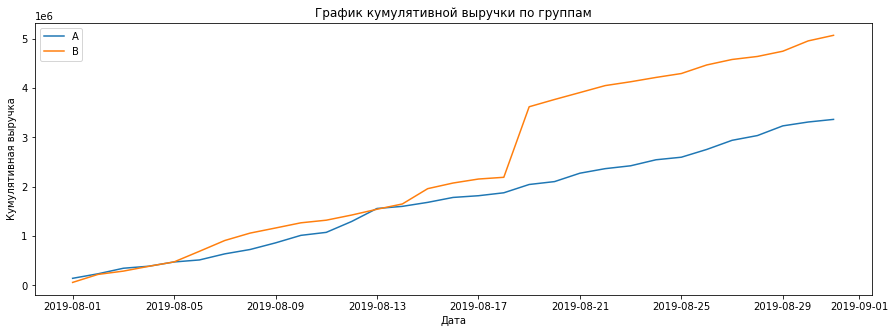

In [30]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend();

Выручка группы В стабильно выше А. Однако, график группы В резко возрастает 18 августа, что может говорить о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

<a id='6-bullet'></a>
### Построение графика кумулятивного среднего чека по группам. Выводы и предположения.

Построим график кумулятивного среднего чека по группам

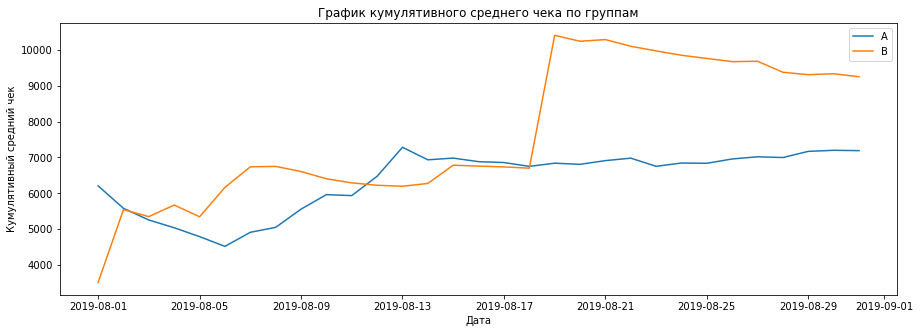

In [31]:
plt.figure(figsize=(15,5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.legend(); 

На графиках можно наблюдать увеличение среднего чека для обеих групп. Средний чек группы `В`, в целом, выше, чем у `А`. Но и здесь можно заметить резкий увеличение среднено чека 18 августа у группы `B`.

<a id='7-bullet'></a>
### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

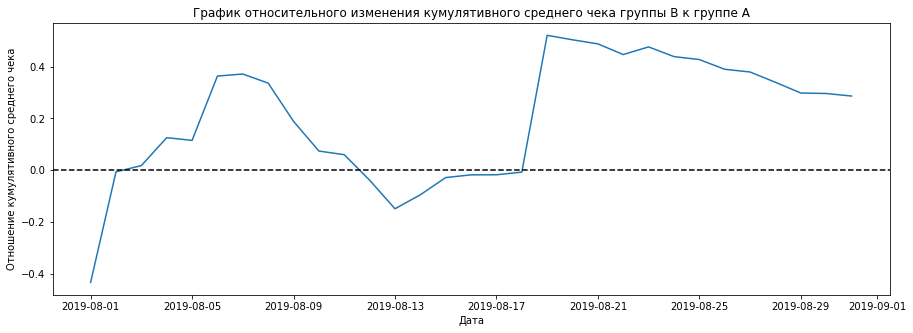

In [32]:
plt.figure(figsize=(15,5))
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивного среднего чека')
plt.show()

В нескольких точках график различия между сегментами резко изменяется. Это говорит, что в данных есть крупные заказы и выбросы.

<a id='8-bullet'></a>
### Построение графика кумулятивной конверсии по группам. Выводы и предположения.

Построим график кумулятивной конверсии по группам

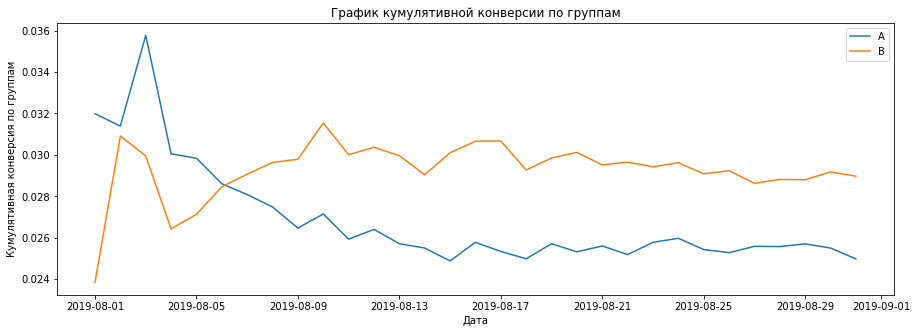

In [33]:
plt.figure(figsize=(15,5))
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия по группам')
plt.legend()
plt.show()

Конверсия лучше у группы `В`. В двух графиках имеются резкие колебания, что может говорить о выбросах.

<a id='9-bullet'></a>
### Построение графика относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения.

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

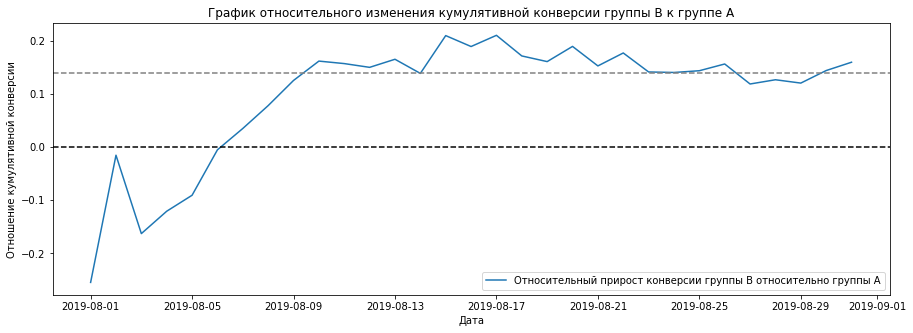

In [34]:
plt.figure(figsize=(15,5))
merged_сumulative_сonversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(merged_сumulative_сonversions['date'], merged_сumulative_сonversions['conversionB']/merged_сumulative_сonversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивной конверсии')
plt.legend()
plt.show()

В начале теста группа `B` значительно проигрывала группе `A`, затем вырвалась вперёд. 

<a id='10-bullet'></a>
### Построение точечного графика количества заказов по пользователям. Выводы и предположения.

Построим точечный график количества заказов по пользователям.

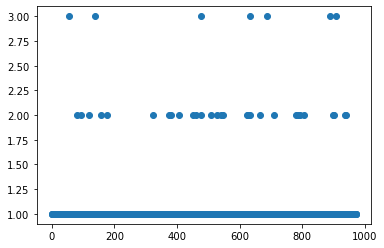

In [35]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns = ['visitor', 'transaction']
x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['transaction'])

Много пользователей, делавших заказ от 1 до 2 раз. Можно предположить, что показатели количества заказов от 2 и более можно считать аномальными.

<a id='11-bullet'></a>
### Расчет 95-го и 99-го перцентиля количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [36]:
np.percentile(orders_by_users['transaction'], [90, 95, 99])

array([1., 1., 2.])

Не более 5% пользователей оформляли больше чем 1  заказов. И 1% пользователей заказывали более 2 раза.
Разумно выбрать  2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

<a id='12-bullet'></a>
### Построение точечного графика стоимостей заказов. Выводы и предположения.

Построим точечный график стоимостей заказов.

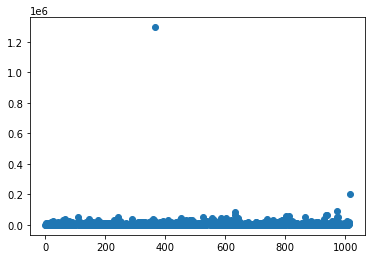

In [37]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

На графике можно наблюдать, что два заказа превышают стоимость в 200000.

(0.0, 200000.0)

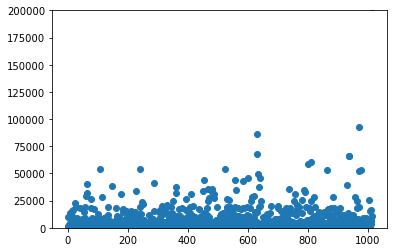

In [38]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0,200000)

Большинство заказов не превышют стоимости в 100000. 

<a id='13-bullet'></a>
### Расчет 95-го и 99-го перцентиля стоимости заказов. Выбор границы для определения аномальных заказов.

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [39]:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

Не более 5% заказов превышают стоимость 26785 и не более 1% стоимость 53904. Таким образов границу для определения аномальных заказов можно выбрать в 50000.

<a id='14-bullet'></a>
### Расчет статистической значимости различий в конверсии между группами по «сырым» данным. Выводы и предположения.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Для проверки гипотез используем критерий проверки Манна-Уитни, так как в данных есть выбросы. Уровень значимости обозначим в 0.05.

Статистическую значимость различий в конверсии будем считать по среднему числу заказов в группах.

Для начала сформулируем нулевую гипотезу: Между средними показатели числа заказов группы `A` и группы `B` нет статистически значимых различий. Альтернативная гипотеза: Между средними показатели числа заказов группы `A` и группы `B` есть статистически значимые различия.

Посчитаем сколько покупок совершили пользователи группы `A`.

In [40]:
sample_a_orders = orders[
    orders['group'] == 'A'
].groupby(['visitor_id'], as_index=False).agg({'transaction_id': pd.Series.nunique})
sample_a_orders.columns = ['visitor', 'orders']

Добавим в таблицу `sample_a_orders` пользователей, которые не совершали покупок. Количество их покупок будет равно `0`.

In [41]:
sample_a_data = pd.concat(
    [
        sample_a_orders['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(sample_a_orders['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Посчитаем сколько покупок совершили пользователи группы `B`.

In [42]:
sample_b_orders = orders[
    orders['group'] == 'B'
].groupby(['visitor_id'], as_index=False).agg({'transaction_id': pd.Series.nunique})
sample_b_orders.columns = ['visitor', 'orders']

Добавим в таблицу `sample_b_orders` пользователей, которые не совершали покупок. Количество их покупок будет равно `0`.

In [43]:
sample_b_data = pd.concat(
    [
        sample_b_orders['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(sample_b_orders['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Проведем тест

In [44]:
st.mannwhitneyu(sample_a_data, sample_b_data)[1]

0.011018084110014696

Нулевую гипотезу можно отвегнуть в пользу альтернативной, так как показатель p-value меньше 0.05. Это говорит, что между группами есть статистически значимые различия в среднем числе покупок. 

In [45]:
sample_b_data.mean() / sample_a_data.mean() - 1

0.1597977924896936

Среднее количество покупок группы `B` больше, чем у группы `A` на 15 процентов.

<a id='15-bullet'></a>
### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.

Для начала сформулируем нулевую гипотезу: Между показателями среднего чека группы `A` и группы `B` нет статистически значимых различий. Альтернативная гипотеза: Между показателями среднего чека группы `A` и группы `B` есть статистически значимые различия.

Проведем тест:

In [46]:
st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

0.8294908998149533

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

Сравним средние показатели:

In [47]:
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1

0.28660287636871096

Впрочем, средний чек группы B выше среднего чека группы A на 29 процентов.

<a id='16-bullet'></a>
### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным. Выводы и предположения.

Теперь посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Создадим переменную `abnormal_users`, в которой будут id пользователей с аномальным количеством заказов и стоимостью покупок.

In [48]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby(['visitor_id'], as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'transaction_id']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'transaction_id']
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['transaction_id'] > np.percentile(orders['transaction_id'],  99)]['visitor_id'],
        orders_by_users_b[orders_by_users_b['transaction_id'] > np.percentile(orders['transaction_id'],  99)]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'],  99)]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Для начала сформулируем нулевую гипотезу: Между средними показатели числа заказов группы A и группы B нет статистически значимых различий. Альтернативная гипотеза: Между средними показатели числа заказов группы A и группы B есть статистически значимые различия.

Отфильтруем пользователей в таблице `sample_a_orders` и добавим их в таблицу `sample_a_filtered_data` вместе с пользователями совершившими ноль покупок.

In [49]:
sample_a_filtered_data = pd.concat(
    [
        sample_a_orders[
            np.logical_not(sample_a_orders['visitor'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(sample_a_orders['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Отфильтруем пользователей в таблице `sample_b_orders` и добавим их в таблицу `sample_b_filtered_data` вместе с пользователями совершившими ноль покупок.

In [50]:
sample_b_filtered_data = pd.concat(
    [
        sample_b_orders[
            np.logical_not(sample_b_orders['visitor'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(sample_b_orders['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Проведем тест

In [51]:
st.mannwhitneyu(sample_a_filtered_data,sample_b_filtered_data)[1]

0.00968752706566317

Нулевую гипотезу можно отвегнуть в пользу альтернативной, так как показатель p-value меньше 0.05. Это говорит, что между группами есть статистически значимые различия в среднем числе покупок. 

Сравним средние показатели:

In [52]:
sample_b_filtered_data.mean() / sample_a_filtered_data.mean() - 1

0.1637010155938794

Среднее количество покупок группы `B` больше, чем у группы `A` на 16 процентов.

<a id='17-bullet'></a>
### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая гипотеза: Между показателями среднего чека группы `A` и группы `B` нет статистически значимых различий. Альтернативная гипотеза: Между показателями среднего чека группы `A` и группы `B` есть статистически значимые различия.

Проведем тест между группами по «очищенным» данным.

In [53]:
st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]

0.9006884356560738

P-value значительно больше 0.05. Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

Также посчитаем на сколько различаются средние чеки у двух групп.

In [54]:
orders[
    np.logical_and(orders['group'] == 'B',
                   np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                  )
]['revenue'].mean()/ orders[
    np.logical_and(orders['group'] == 'A',
                        np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                       )]['revenue'].mean()- 1

-0.0316273123630616

После очистки данных проверка также показала отсутсвие различий в среднем чеке, но относительная разница среднего чека группы `B` к группе `A` изменилась. Теперь средний чек группы `B` на 3 процента меньше группы `A`.

<a id='18-bullet'></a>
### Решение по результатам теста.

Исходя из графика кумулятивной конверсии можно сделать вывод, что конверсия группы `B` лучше `A`. Статистический тест также показывает, что между группами также есть статистическая значимость различий в конверсии. Статистически значимого различия в среднем чеке заказа между группами нет. 

В результате можно зафиксировать победу группы B. У этой группы лучше конверсия, но не замечается увеличение среднего чека.